<a href="https://colab.research.google.com/github/juandsalazars/pandas-training/blob/main/Page_view_time_series_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Page View Time Series Visualizer - freecodecamp.org

In [84]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('fcc-forum-pageviews.csv')
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


Let's clean the data first

In [85]:
print('Before cleaning: ', df.size)
df = df[
    (df['value'] < df['value'].quantile(0.975)) &
    (df['value'] > df['value'].quantile(0.025))
]
print('After cleaning: ', df.size)
print('==============')
print(df.head())

Before cleaning:  2608
After cleaning:  2476
          date  value
10  2016-05-19  19736
17  2016-05-26  18060
18  2016-05-27  19997
19  2016-05-28  19044
20  2016-05-29  20325


## Draw a line plot that shows the amount of views by date

In [86]:
df_line_plot = df.copy()
df_line_plot.loc[:,'date'] = pd.to_datetime(df_line_plot['date'])
df_line_plot.set_index('date', inplace=True)
df_line_plot.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


Text(0, 0.5, 'Page Views')

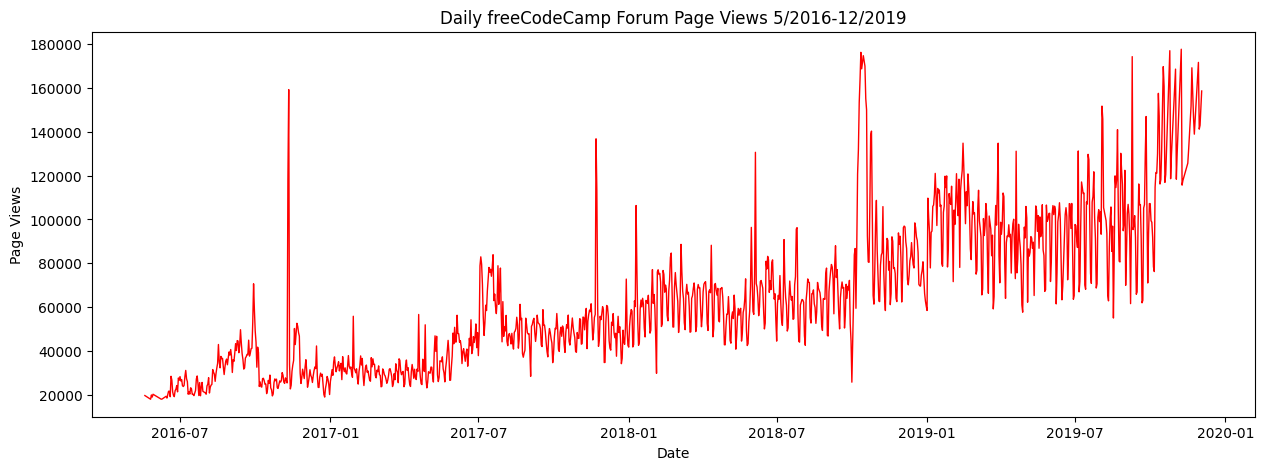

In [88]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df_line_plot.index, df_line_plot['value'], linewidth=1, color='red')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')

## Draw a bar plot in which the average view per month per year is shown

In [111]:
df_bar = df.copy()
df_bar.loc[:,'date'] = pd.to_datetime(df_bar['date'])
df_bar['year'] = [d.year for d in df_bar.date]
df_bar['month'] = [d.strftime('%B') for d in df_bar.date]
df_bar.head()

,date,value,year,month
10,2016-05-19 00:00:00,19736,2016,May
17,2016-05-26 00:00:00,18060,2016,May
18,2016-05-27 00:00:00,19997,2016,May
19,2016-05-28 00:00:00,19044,2016,May
20,2016-05-29 00:00:00,20325,2016,May


In [112]:
last_month_day_mask = ~df_bar.duplicated(subset=['year', 'month'], keep='last')

df_bar_averages = df_bar[last_month_day_mask].reset_index(drop=True)
df_bar_averages['value'] = df['value'].astype(float)
for idx, row in df_bar_averages.iterrows():
    df_bar_averages.at[idx, 'value'] = df_bar[
        (df_bar['year'] == int(row['year'])) &
        (df_bar['month'] == str(row['month']))
    ]['value'].mean()

df_bar_averages.head()

,date,value,year,month
0,2016-05-29 00:00:00,19432.400000,2016,May
1,2016-06-30 00:00:00,21875.105263,2016,June
2,2016-07-29 00:00:00,24109.678571,2016,July
3,2016-08-31 00:00:00,31049.193548,2016,August
4,2016-09-30 00:00:00,41476.866667,2016,September


In [113]:
# This is important for the correct order of the bars in the graph
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

df_bar_averages['month'] = pd.Categorical(
    df_bar_averages['month'], categories=month_order, ordered=True
)

df_pivot = df_bar_averages.pivot_table(
    index='year', columns='month', values='value', sort=False
)

df_pivot.head()

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


Text(0, 0.5, 'Average Page Views')

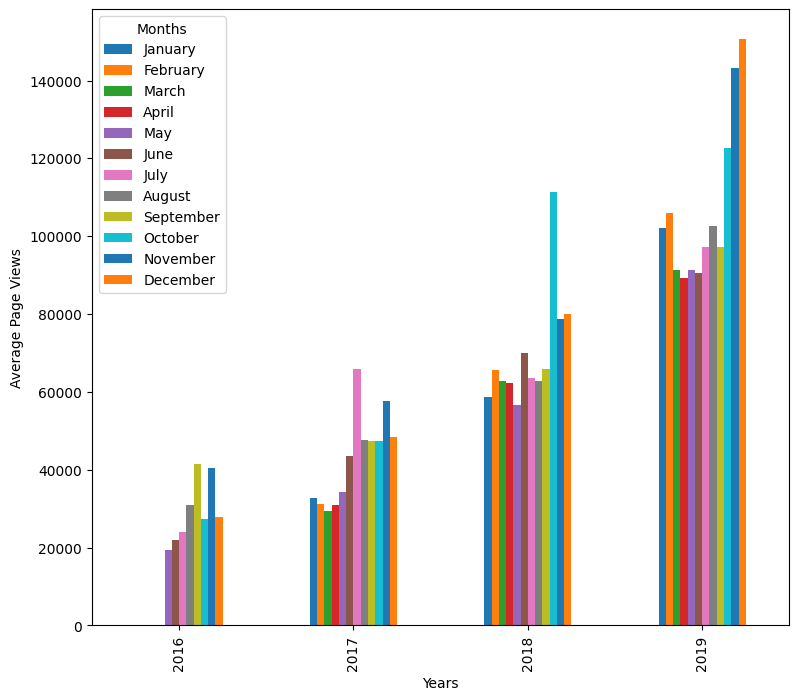

In [114]:
fig, ax = plt.subplots(figsize=(9, 8))
df_pivot.plot(kind='bar', ax=ax)
ax.legend(title='Months')
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')


### How chatGPT does it:

In [125]:
df_bar_chatgpt = df_bar.copy()

df_grouped = df_bar_chatgpt.groupby(['year', 'month'], as_index=False).agg({'value': 'mean'})
df_grouped['month'] = pd.Categorical(df_grouped['month'], categories=month_order, ordered=True)
df_grouped.head()

,year,month,value
0,2016,August,31049.193548
1,2016,December,27832.419355
2,2016,July,24109.678571
3,2016,June,21875.105263
4,2016,May,19432.400000


Text(0, 0.5, 'Average Page Views')

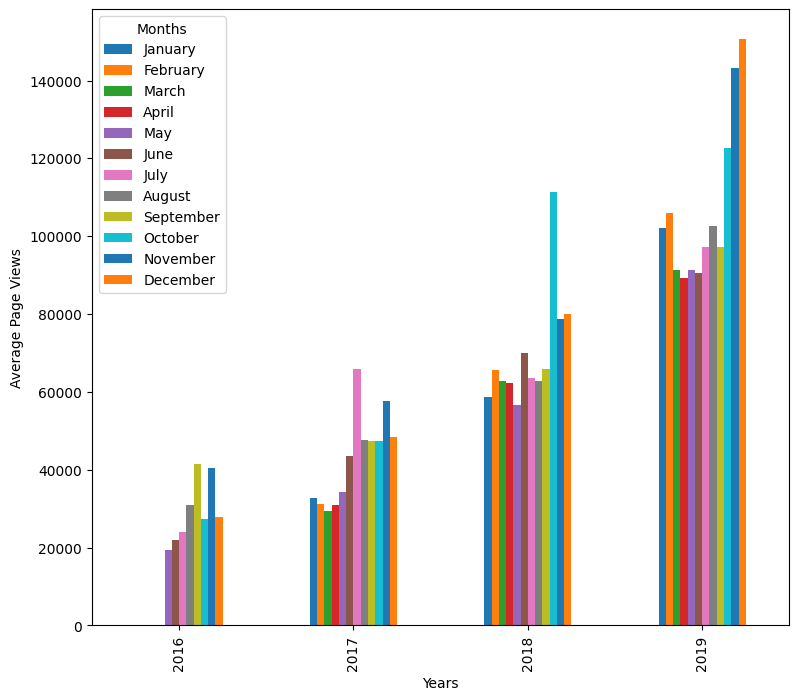

In [128]:
df_pivot = df_grouped.pivot_table(
    index='year', columns='month', values='value', sort=False
)

fig, ax = plt.subplots(figsize=(9, 8))
df_pivot.plot(kind='bar', ax=ax)
ax.legend(title='Months')
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')

## Draw two box plots, one showing the trend by year, and the other showing the seasonality (by month)

In [132]:
df_box = df.copy()
df_box.loc[:,'date'] = pd.to_datetime(df_box['date'])
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

month_order = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]

df_box['month'] = pd.Categorical(df_box['month'], categories=month_order, ordered=True)

df_box.head()

,date,value,year,month
10,2016-05-19 00:00:00,19736,2016,May
17,2016-05-26 00:00:00,18060,2016,May
18,2016-05-27 00:00:00,19997,2016,May
19,2016-05-28 00:00:00,19044,2016,May
20,2016-05-29 00:00:00,20325,2016,May


Text(0, 0.5, 'Page Views')

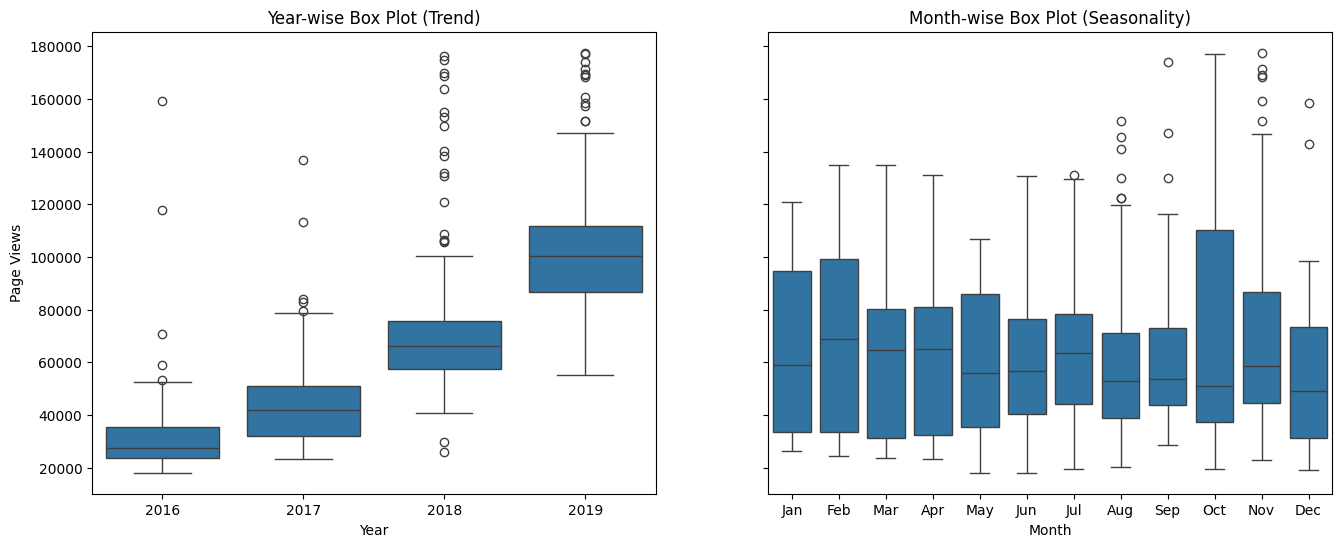

In [133]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.boxplot(data=df_box, x='year', y='value', ax=axes[0])
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')

sns.boxplot(data=df_box, x='month', y='value', ax=axes[1])
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')